# 1.устранение пропусков в данных;

## 1).устранение пропусков в данных;

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Будем использовать только обучающую выборку
rdata = pd.read_csv('/content/drive/MyDrive/DataSets/All-Planets-Dataset.csv')
old_shape = rdata.shape
#rdata = rdata.dropna() # 删除表中带有空值的行
new_shape = rdata.shape
print('old shape:', old_shape, '\tnew shape:', new_shape)

old shape: (822, 9) 	new shape: (822, 9)


In [71]:
rdata

,name,mass,radius,period,semi_major_axis,temperature,distance_light_year,host_star_mass,host_star_temperature
0,HD 240210 b,5.2100,NaN,501.750000,1.16000,NaN,465.96,0.82,4297.0
1,Gliese 1214 b,0.0197,0.254,1.580405,0.01411,547.0,47.78,0.15,3026.0
2,CoRoT-30 b,2.9000,1.009,9.060050,0.08440,NaN,3100.00,0.98,5650.0
3,HD 4203 b,2.2300,NaN,431.880000,1.17000,NaN,266.05,1.25,5596.0
4,HD 4203 c,2.1700,NaN,6700.000000,6.95000,NaN,253.80,1.13,5702.0
...,...,...,...,...,...,...,...,...,...
817,HD 222076 b [id],1.5600,NaN,871.000000,1.83000,NaN,272.00,1.07,4806.0
818,TOI-2257 b,NaN,0.196,35.189346,0.14500,256.0,188.50,0.33,3430.0
819,HD 17674 b,0.8700,NaN,623.800000,1.42000,NaN,145.00,0.98,5904.0
820,HD 108874 b,1.4200,NaN,394.481230,1.04000,NaN,194.46,1.10,5600.0


In [72]:
list(zip(rdata.columns, [i for i in rdata.dtypes]))

[('name', dtype('O')),
 ('mass', dtype('float64')),
 ('radius', dtype('float64')),
 ('period', dtype('float64')),
 ('semi_major_axis', dtype('float64')),
 ('temperature', dtype('float64')),
 ('distance_light_year', dtype('float64')),
 ('host_star_mass', dtype('float64')),
 ('host_star_temperature', dtype('float64'))]

In [73]:
# 找出带有空值的列
hcols_with_na = [c for c in rdata.columns if rdata[c].isnull().sum() > 0]
hcols_with_na

['mass',
 'radius',
 'period',
 'semi_major_axis',
 'temperature',
 'distance_light_year',
 'host_star_mass',
 'host_star_temperature']

In [74]:
rdata.shape

(822, 9)

In [75]:
# 统计每一列的空值数量
[(c, rdata[c].isnull().sum()) for c in hcols_with_na]

[('mass', 44),
 ('radius', 627),
 ('period', 21),
 ('semi_major_axis', 42),
 ('temperature', 640),
 ('distance_light_year', 11),
 ('host_star_mass', 18),
 ('host_star_temperature', 31)]

In [76]:
# 统计每一列中空值所占的百分比
[(c, rdata[c].isnull().mean()) for c in hcols_with_na]

[('mass', 0.0535279805352798),
 ('radius', 0.7627737226277372),
 ('period', 0.025547445255474453),
 ('semi_major_axis', 0.051094890510948905),
 ('temperature', 0.7785888077858881),
 ('distance_light_year', 0.01338199513381995),
 ('host_star_mass', 0.021897810218978103),
 ('host_star_temperature', 0.037712895377128956)]

In [77]:
# 剔除缺失值较多的列，并剔除有缺失值的行
#rcols_intersted = ['name', 'mass', 'period', 'semi_major_axis', 'distance_light_year', 'host_star_mass', 'host_star_temperature']
rcols_intersted = ['mass', 'semi_major_axis', 'temperature', 'distance_light_year', 'host_star_mass', 'host_star_temperature']
rdata_drop = rdata[rcols_intersted].dropna(axis=0, how='any')
print(rdata.shape, rdata_drop.shape)

(822, 9) (154, 6)


In [78]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=10, ax=ax, color='red', density=True)
        new_ds[c].hist(bins=10, ax=ax, color='green', density=True, alpha=0.5)
        plt.show()

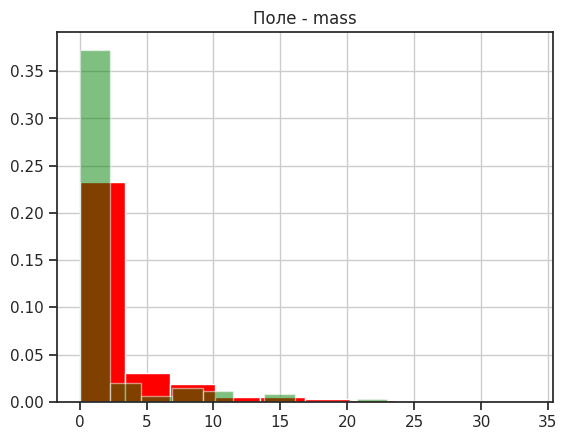

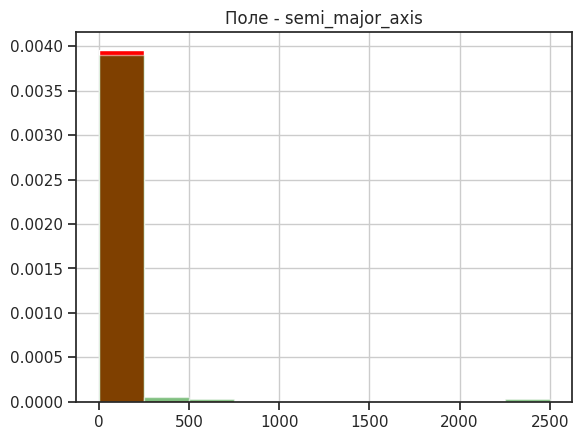

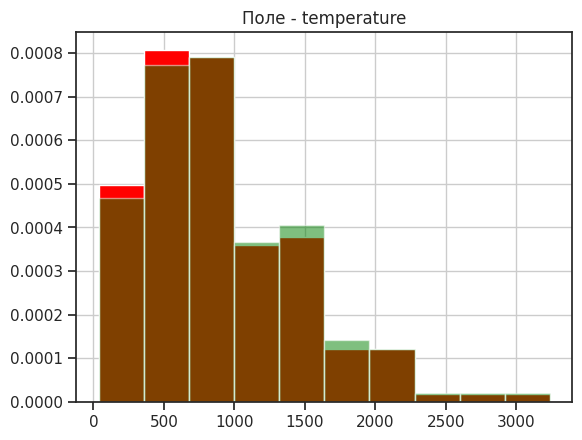

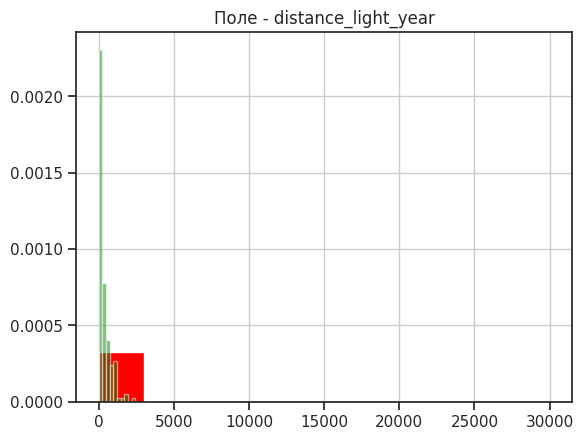

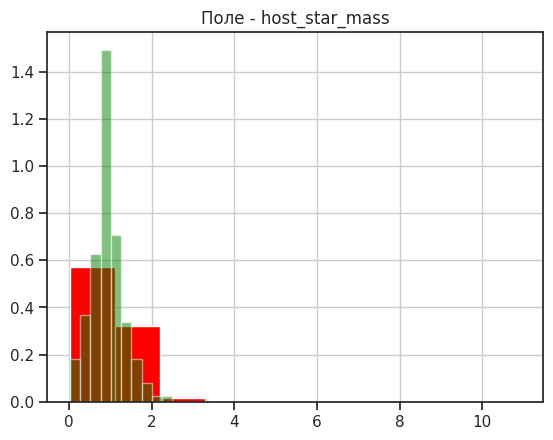

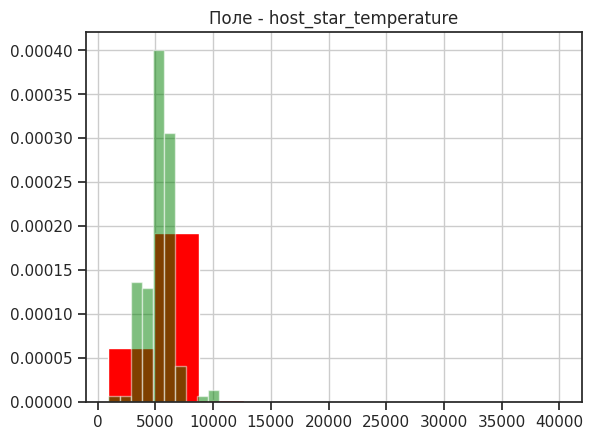

In [79]:
plot_hist_diff(rdata[rcols_intersted], rdata_drop, rcols_intersted)

## Заполнение значений для одного признака

In [80]:
temp_x1 = np.array([[np.nan, 1, 3], [4, 0, np.nan], [8, 1, 0]])
print('Исходный массив:')
print(temp_x1)
indicator = MissingIndicator()
temp_x1_transformed = indicator.fit_transform(temp_x1)
print('Маска пропущенных значений:')
print(temp_x1_transformed)

Исходный массив:
[[nan  1.  3.]
 [ 4.  0. nan]
 [ 8.  1.  0.]]
Маска пропущенных значений:
[[ True False]
 [False  True]
 [False False]]


In [81]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [82]:
all_data, filled_data, missed_data = impute_column(rdata, 'mass', 'mean')
all_data[:20]

array([5.21   , 0.0197 , 2.9    , 2.23   , 2.17   , 0.081  , 0.523  ,
       1.99   , 0.5    , 0.056  , 1.4    , 0.45   , 0.05078, 1.167  ,
       0.251  , 4.42   , 0.67   , 6.02   , 1.4    , 1.97   ])

In [83]:
filled_data

array([2.47903078, 2.47903078, 2.47903078, 2.47903078, 2.47903078,
       2.47903078, 2.47903078, 2.47903078, 2.47903078, 2.47903078,
       2.47903078, 2.47903078, 2.47903078, 2.47903078, 2.47903078,
       2.47903078, 2.47903078, 2.47903078, 2.47903078, 2.47903078,
       2.47903078, 2.47903078, 2.47903078, 2.47903078, 2.47903078,
       2.47903078, 2.47903078, 2.47903078, 2.47903078, 2.47903078,
       2.47903078, 2.47903078, 2.47903078, 2.47903078, 2.47903078,
       2.47903078, 2.47903078, 2.47903078, 2.47903078, 2.47903078,
       2.47903078, 2.47903078, 2.47903078, 2.47903078])

In [84]:
missed_data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

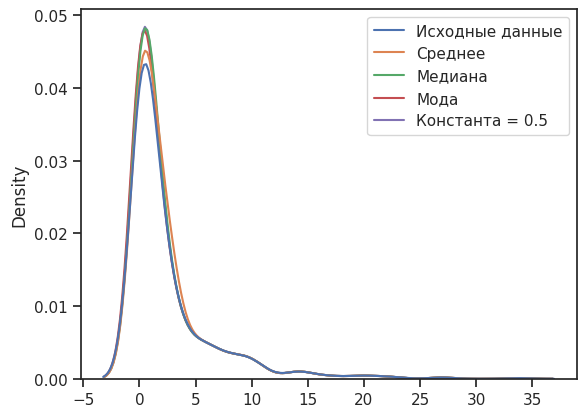

In [85]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

research_impute_numeric_column(rdata, 'mass', 0.5)

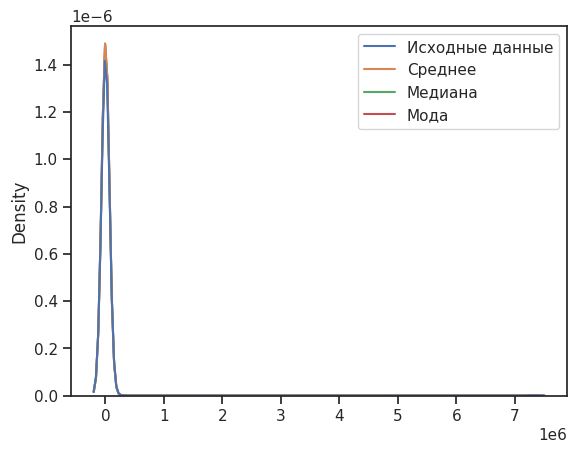

In [86]:
research_impute_numeric_column(rdata, 'period')

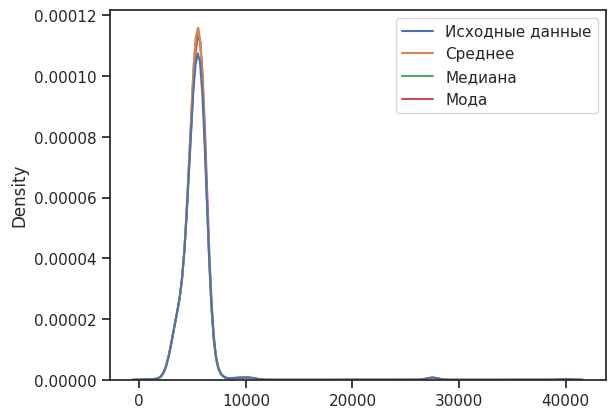

In [87]:
research_impute_numeric_column(rdata, 'host_star_temperature')

## Заполнение "хвостом распределения"

In [88]:
mass_ev = rdata['mass'].mean() + 3*rdata['mass'].std()
mass_ev

14.693650285324736

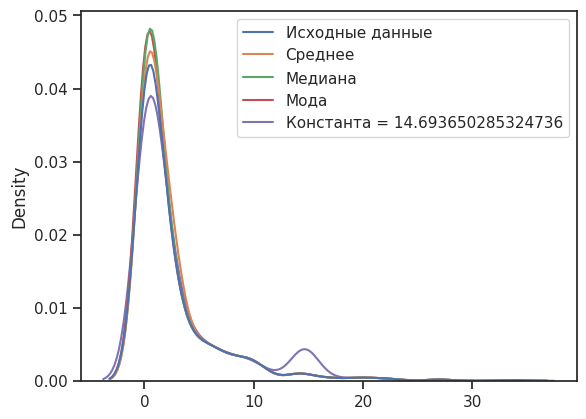

In [89]:
research_impute_numeric_column(rdata, 'mass', mass_ev)

In [90]:
# Ассиметричное
IQR = rdata['host_star_temperature'].quantile(0.75) - rdata['host_star_temperature'].quantile(0.25)
temperature_ev1 = rdata['host_star_temperature'].quantile(0.75) + 3*IQR
print('IQR={}, extreme_value={}'.format(IQR, temperature_ev1))

IQR=976.0, extreme_value=8764.0


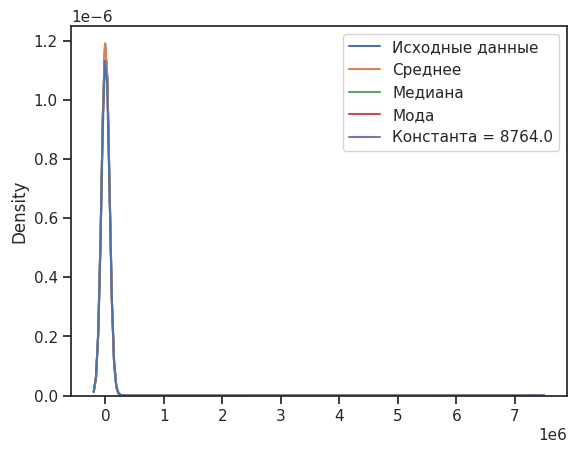

In [91]:
research_impute_numeric_column(rdata, 'period', temperature_ev1)

In [92]:
tempereture_ev2 = rdata['host_star_temperature'].quantile(0.75) + 1.5*IQR
print('IQR={}, extreme_value={}'.format(IQR, tempereture_ev2))

IQR=976.0, extreme_value=7300.0


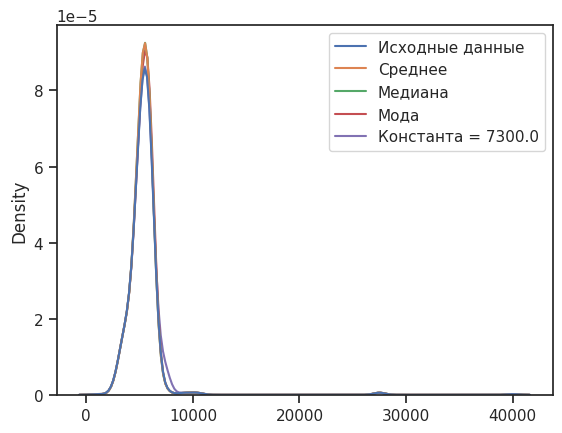

In [93]:
research_impute_numeric_column(rdata, 'host_star_temperature', tempereture_ev2)

In [94]:
IQR_lf = rdata['mass'].quantile(0.75) - rdata['mass'].quantile(0.25)
mass_ev1 = rdata['mass'].quantile(0.75) + 1.5*IQR_lf
mass_ev2 = rdata['mass'].quantile(0.75) + 3*IQR_lf

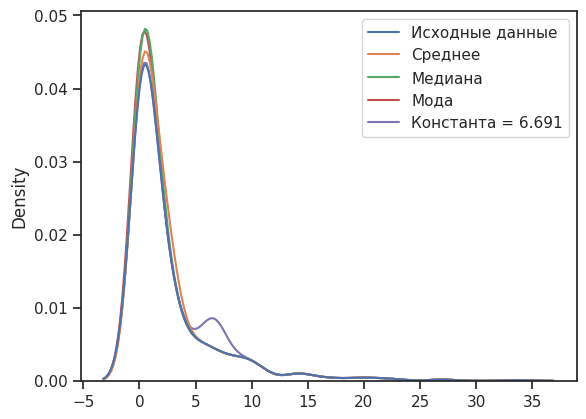

In [95]:
research_impute_numeric_column(rdata, 'mass', mass_ev1)

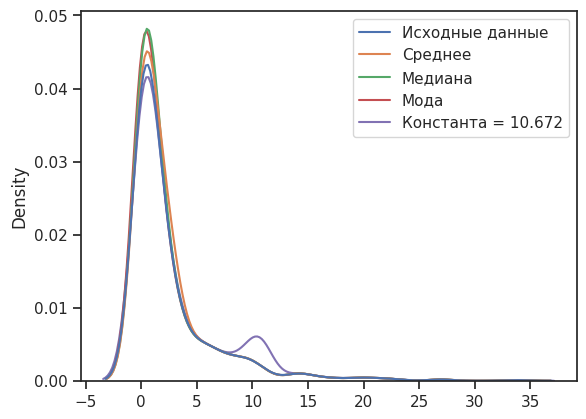

In [96]:
research_impute_numeric_column(rdata, 'mass', mass_ev2)

# 2.кодирование категориальных признаков;

### Загрузка и предобработка данных

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
sns.set(style="ticks")

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
cdata = pd.read_csv('/content/drive/MyDrive/DataSets/insurance.csv')
cdata.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [100]:
cdata.shape

(1338, 7)

In [101]:
data_features = list(zip(
# признаки
[i for i in cdata.columns],
zip(
    # типы колонок
    [str(i) for i in cdata.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in cdata.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('age', ('int64', 0)),
 ('sex', ('object', 0)),
 ('bmi', ('float64', 0)),
 ('children', ('int64', 0)),
 ('smoker', ('object', 0)),
 ('region', ('object', 0)),
 ('expenses', ('float64', 0))]

In [103]:
cols_filter = ['age', 'bmi', 'sex', 'children', 'smoker', 'region', 'expenses']
data = cdata[cols_filter]
data.head()

,age,bmi,sex,children,smoker,region,expenses
0,19,27.9,female,0,yes,southwest,16884.92
1,18,33.8,male,1,no,southeast,1725.55
2,28,33.0,male,3,no,southeast,4449.46
3,33,22.7,male,0,no,northwest,21984.47
4,32,28.9,male,0,no,northwest,3866.86


## 1）. Кодирование категорий целочисленными значениями - label encoding

In [104]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['region'])

In [105]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [106]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

In [107]:
le.inverse_transform([0, 1, 2, 3])

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

## 2). Кодирование категорий наборами бинарных значений - one-hot encoding

In [108]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['sex']])
cat_enc_ohe

<1338x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1338 stored elements in Compressed Sparse Row format>

In [109]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]])

Pandas get_dummies - быстрый вариант one-hot кодирования

Преимущество в том, что возвращается Pandas DataFrame.

In [110]:
pd.get_dummies(data[['sex']]).head()

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [111]:
# Добавление отдельной колонки, признака пустых значений
pd.get_dummies(data[['sex']], dummy_na=True).head()

,sex_female,sex_male,sex_nan
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [112]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [113]:
from category_encoders.one_hot import OneHotEncoder as ce_OneHotEncoder

ce_OneHotEncoder1 = ce_OneHotEncoder()
data_ONE = ce_OneHotEncoder1.fit_transform(data[data.columns.difference(['age'])])
data_ONE

,bmi,children,expenses,region_1,region_2,region_3,region_4,sex_1,sex_2,smoker_1,smoker_2
0,27.9,0,16884.92,1,0,0,0,1,0,1,0
1,33.8,1,1725.55,0,1,0,0,0,1,0,1
2,33.0,3,4449.46,0,1,0,0,0,1,0,1
3,22.7,0,21984.47,0,0,1,0,0,1,0,1
4,28.9,0,3866.86,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,31.0,3,10600.55,0,0,1,0,0,1,0,1
1334,31.9,0,2205.98,0,0,0,1,1,0,0,1
1335,36.9,0,1629.83,0,1,0,0,1,0,0,1
1336,25.8,0,2007.95,1,0,0,0,1,0,0,1


## 3). Count (frequency) encoding

特征频率编码，将处理age参数以外的所有非数据型参数统计频率作为输入

In [114]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [115]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['sex'])])
data_COUNT_ENC

,age,bmi,children,expenses,region,smoker
0,19,27.9,0,16884.92,325,274
1,18,33.8,1,1725.55,364,1064
2,28,33.0,3,4449.46,364,1064
3,33,22.7,0,21984.47,325,1064
4,32,28.9,0,3866.86,325,1064
...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,325,1064
1334,18,31.9,0,2205.98,324,1064
1335,18,36.9,0,1629.83,364,1064
1336,21,25.8,0,2007.95,325,1064


In [117]:
data_COUNT_ENC['expenses'].unique()

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [118]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['expenses'])])
data_FREQ_ENC

,age,bmi,children,region,sex,smoker
0,19,27.9,0,0.242900,0.494768,0.204783
1,18,33.8,1,0.272048,0.505232,0.795217
2,28,33.0,3,0.272048,0.505232,0.795217
3,33,22.7,0,0.242900,0.505232,0.795217
4,32,28.9,0,0.242900,0.505232,0.795217
...,...,...,...,...,...,...
1333,50,31.0,3,0.242900,0.505232,0.795217
1334,18,31.9,0,0.242152,0.494768,0.795217
1335,18,36.9,0,0.272048,0.494768,0.795217
1336,21,25.8,0,0.242900,0.494768,0.795217


In [119]:
data_FREQ_ENC['region'].unique()

array([0.24289985, 0.27204783, 0.24215247])

# 3.нормализацию числовых признаков.

In [120]:
from sklearn.preprocessing import MinMaxScaler

Чтение набора данных

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
rdata = pd.read_csv('/content/drive/MyDrive/DataSets/All-Planets-Dataset.csv')
df = rdata[['mass', 'period', 'host_star_mass', 'host_star_temperature']]
df

,mass,period,host_star_mass,host_star_temperature
0,5.2100,501.750000,0.82,4297.0
1,0.0197,1.580405,0.15,3026.0
2,2.9000,9.060050,0.98,5650.0
3,2.2300,431.880000,1.25,5596.0
4,2.1700,6700.000000,1.13,5702.0
...,...,...,...,...
817,1.5600,871.000000,1.07,4806.0
818,NaN,35.189346,0.33,3430.0
819,0.8700,623.800000,0.98,5904.0
820,1.4200,394.481230,1.10,5600.0


## 1). минмакс-нормализация данных 最大最小归一化

In [123]:
# 创建MinMaxScaler对象
scaler = MinMaxScaler()
# 对数据进行最大最小归一化
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,mass,period,host_star_mass,host_star_temperature
0,0.154599,6.872045e-05,0.073260,0.085945
1,0.000584,2.040684e-07,0.011905,0.053405
2,0.086053,1.228677e-06,0.087912,0.120584
3,0.066172,5.914922e-05,0.112637,0.119201
4,0.064391,9.177958e-04,0.101648,0.121915
...,...,...,...,...
817,0.046291,1.193026e-04,0.096154,0.098976
818,NaN,4.808033e-06,0.028388,0.063748
819,0.025816,8.543963e-05,0.087912,0.127087
820,0.042136,5.402610e-05,0.098901,0.119304


## 2).нормализация с использованием среднего значения 均值归一化

In [124]:
# 创建StandardScaler对象，对数据进行均值归一化
'''它是把所有数据归到均值为0，方差为1的分布中。 即确保最终得到的数据均值为0，方差为1'''
scaler1 = StandardScaler()
df_scaled1 = scaler1.fit_transform(df)
df_scaled1 = pd.DataFrame(df_scaled1, columns=df.columns)
print(df_scaled1)

         mass    period  host_star_mass  host_star_temperature
0    0.671178 -0.040207       -0.391239              -0.532968
1   -0.604418 -0.042146       -1.428432              -1.152394
2    0.103460 -0.042117       -0.143550               0.126422
3   -0.061203 -0.040477        0.274423               0.100105
4   -0.075949 -0.016176        0.088657               0.151764
..        ...       ...             ...                    ...
817 -0.225866 -0.038775       -0.004226              -0.284905
818       NaN -0.042015       -1.149783              -0.955503
819 -0.395444 -0.039733       -0.143550               0.250210
820 -0.260273 -0.040622        0.042216               0.102054
821 -0.365952 -0.035856        0.042216               0.102054

[822 rows x 4 columns]


## 3).нормализация по среднему 平均值归一化

In [125]:
df_scaled = (df - df.mean()) / df.std()
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,mass,period,host_star_mass,host_star_temperature
0,0.670746,-0.040182,-0.390995,-0.532631
1,-0.604030,-0.042119,-1.427544,-1.151666
2,0.103393,-0.042090,-0.143461,0.126342
3,-0.061164,-0.040452,0.274252,0.100042
4,-0.075900,-0.016166,0.088602,0.151668
...,...,...,...,...
817,-0.225721,-0.038751,-0.004223,-0.284724
818,NaN,-0.041989,-1.149068,-0.954899
819,-0.395190,-0.039709,-0.143461,0.250052
820,-0.260106,-0.040597,0.042189,0.101990
